In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/new_data_tech_layoffs.csv')

# Chuyển đổi các biến phân loại thành số
label_encoders = {}
categorical_columns = ['Location_HQ', 'Country', 'Industry', 'Stage']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Chuẩn bị dữ liệu
X = df[['Location_HQ', 'Country', 'Company_Size_before_Layoffs', 'Industry', 'Stage', 'Money_Raised_in_$_mil', 'Year']]
y = df['Percentage']

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Khởi tạo mô hình Sequential
model = Sequential()

# Thêm các lớp (layers) vào mô hình
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # Đầu ra là một giá trị liên tục

# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# In ra cấu trúc mô hình
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Huấn luyện mô hình
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
29/29 [==============================] - 2s 10ms/step - loss: 944.1525 - val_loss: 680.3467
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 808.2664 - val_loss: 509.8969
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 561.6483 - val_loss: 357.5518
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 457.1292 - val_loss: 361.5526
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 437.9945 - val_loss: 343.9172
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 429.1864 - val_loss: 345.0758
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 424.5735 - val_loss: 342.4703
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 420.2921 - val_loss: 339.7867
Epoch 9/100
29/29 [==============================] - 0s 4ms/step - loss: 416.6056 - val_loss: 342.5663
Epoch 10/100
29/29 [==============================] - 0s 3ms/step - loss

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Tính toán các chỉ số đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


9/9 [==============================] - 0s 2ms/step
Mean Absolute Error: 11.973451519366645
Mean Squared Error: 311.06453088600966
R^2 Score: 0.06910189216496399


In [ ]:
# Tính MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Đánh giá mô hình Random Forest
mse_rf = mean_squared_error(y_test, y_pred)
print(f'Random Forest - Mean Squared Error: {mse_rf}')

# Tính RMSE
rmse = np.sqrt(mse_rf)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 11.973451519366645
Random Forest - Mean Squared Error: 311.06453088600966
Root Mean Squared Error (RMSE): 17.637021599068525


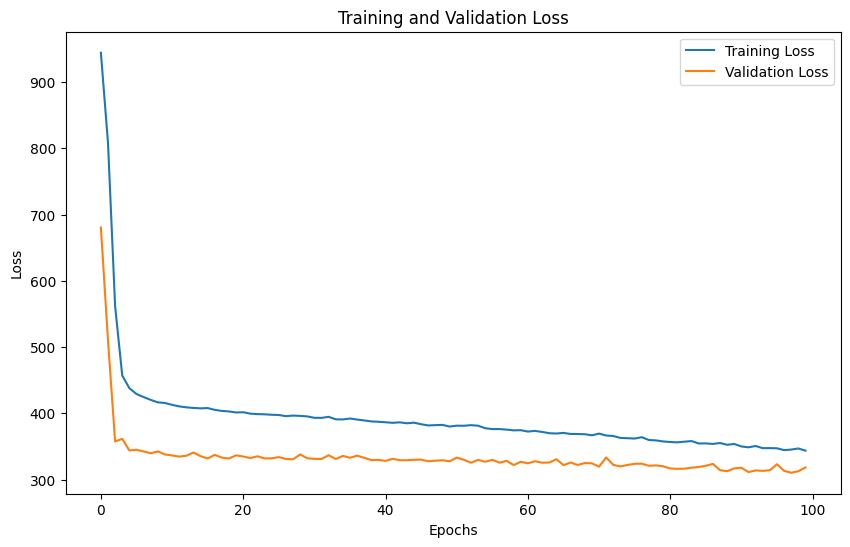

In [ ]:
# Vẽ biểu đồ loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
from tensorflow.keras.layers import Dropout
# Khởi tạo mô hình Sequential
model = Sequential()

# Thêm các lớp (layers) vào mô hình với dropout
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Thêm dropout để tránh overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))  # Đầu ra là một giá trị liên tục

# Compile mô hình với learning rate thấp hơn
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# In ra cấu trúc mô hình
model.summary()

# Huấn luyện mô hình
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=16, validation_split=0.2)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
# Tính MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Đánh giá mô hình Random Forest
mse_rf = mean_squared_error(y_test, y_pred)
print(f'Random Forest - Mean Squared Error: {mse_rf}')

# Tính RMSE
rmse = np.sqrt(mse_rf)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 11.963867959633946
Random Forest - Mean Squared Error: 316.1642349609914
Root Mean Squared Error (RMSE): 17.78100770375491
